/var/folders/7b/vjhrgxr52nd83g6293wmjnsr0000gn/T/ipykernel_95138/999299107.py:18: UserWarning: 

The arrowstyle keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default value for arrowstyle.
Note that using FancyArrowPatches may be slow for large graphs.

  nx.draw_networkx_edges(


NameError: name 'axis' is not defined

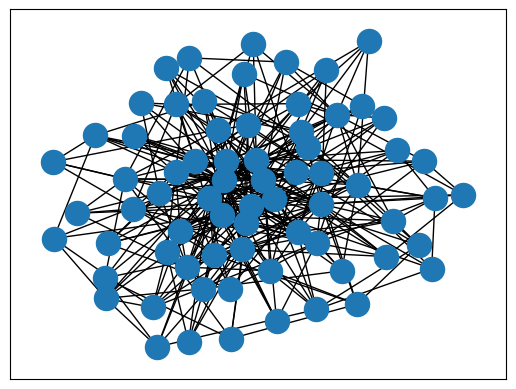

In [1]:
# import community
import networkx as nx
import matplotlib.pyplot as plt

import matplotlib.colors as colors
import matplotlib.cm as cmx

#erdos renyi don't have true community structure
# G = nx.erdos_renyi_graph(60, 0.09)
G = nx.barabasi_albert_graph(70,5)
pos = nx.spring_layout(G)
# nx.draw_networkx(G, 
#                  pos, 
#                  alpha = 0.5, )


nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_edges(
    G, pos,arrowstyle="->",
    connectionstyle="arc3,rad=0.1"  # <-- THIS IS IT
)

axis('off')


/var/folders/7b/vjhrgxr52nd83g6293wmjnsr0000gn/T/ipykernel_95138/1391483419.py:6: UserWarning: 

The arrowstyle keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default value for arrowstyle.
Note that using FancyArrowPatches may be slow for large graphs.

  nx.draw_networkx_edges(


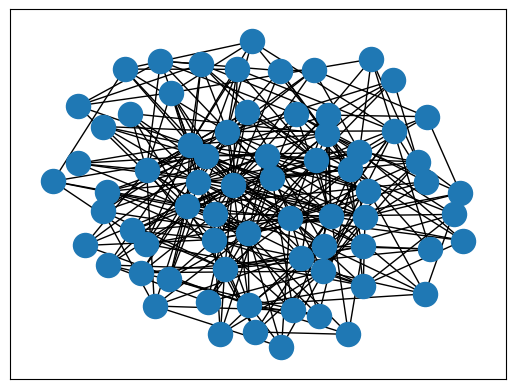

In [2]:
# Compute position of nodes
pos = nx.kamada_kawai_layout(G)

# Draw nodes and edges
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_edges(
    G, pos,arrowstyle="->",
    connectionstyle="arc3,rad=10"  # <-- THIS IS IT
)

/Users/vitaly/miniconda3/envs/py31012/lib/python3.12/site-packages/networkx/drawing/nx_pylab.py:305: UserWarning: 

The connectionstyle keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default value for connectionstyle.
Note that using FancyArrowPatches may be slow for large graphs.

  draw_networkx_edges(G, pos, arrows=arrows, **edge_kwds)


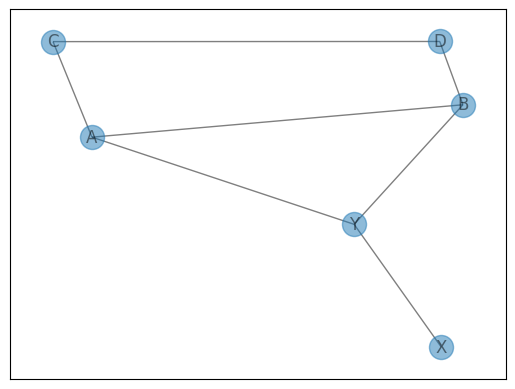

In [14]:

G = nx.Graph()
G.add_edge("A", "B", weight=4)
G.add_edge("B", "D", weight=2)
G.add_edge("A", "C", weight=3)
G.add_edge("C", "D", weight=4)
G.add_edge("X", "Y", weight=4)
G.add_edge("A", "Y", weight=4)
G.add_edge("B", "Y", weight=4)
# nx.shortest_path(G, "A", "D", weight="weight")
pos = nx.kamada_kawai_layout(G)
nx.draw_networkx(G, 
                 pos, 
                 alpha = 0.5, connectionstyle="arc3,rad=10")

In [15]:
import networkx as nx

In [16]:
import numpy as np
import pandas as pd
rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10, 10))
corr = df.corr()
corr + 1

,0,1,2,3,4,5,6,7,8,9
0,2.000000,1.347533,1.398948,1.455743,1.072914,0.766598,0.268778,1.477978,0.557379,1.015185
1,1.347533,2.000000,0.715944,1.571003,0.714517,1.382480,0.637158,1.642578,1.252556,1.190047
2,1.398948,0.715944,2.000000,0.476351,1.152937,0.860824,0.907105,1.016266,0.565984,0.616415
3,1.455743,1.571003,0.476351,2.000000,0.774657,0.772423,0.518452,1.473286,1.279258,1.446650
4,1.072914,0.714517,1.152937,0.774657,2.000000,0.895562,0.852523,0.476717,0.385397,0.810084
5,0.766598,1.382480,0.860824,0.772423,0.895562,2.000000,0.969748,1.417640,1.205851,1.095084
6,0.268778,0.637158,0.907105,0.518452,0.852523,0.969748,2.000000,0.505560,1.381407,0.646348
7,1.477978,1.642578,1.016266,1.473286,0.476717,1.417640,0.505560,2.000000,1.375873,1.417863
8,0.557379,1.252556,0.565984,1.279258,0.385397,1.205851,1.381407,1.375873,2.000000,1.150421
9,1.015185,1.190047,0.616415,1.446650,0.810084,1.095084,0.646348,1.417863,1.150421,2.000000


In [17]:
G = nx.from_pandas_adjacency(corr)

In [ ]:
# rows, cols = np.where(adjacency_matrix == 1)
#     edges = zip(rows.tolist(), cols.tolist())



In [21]:
tidy_corr = df.corr().melt(ignore_index = False).reset_index().\
set_axis( labels = ['var1','var2','value'],
        axis = 1)

In [22]:
tidy_corr

,var1,var2,value
0,0,0,1.000000
1,1,0,0.347533
2,2,0,0.398948
3,3,0,0.455743
4,4,0,0.072914
...,...,...,...
95,5,9,0.095084
96,6,9,-0.353652
97,7,9,0.417863
98,8,9,0.150421


In [25]:
from plotnine import *

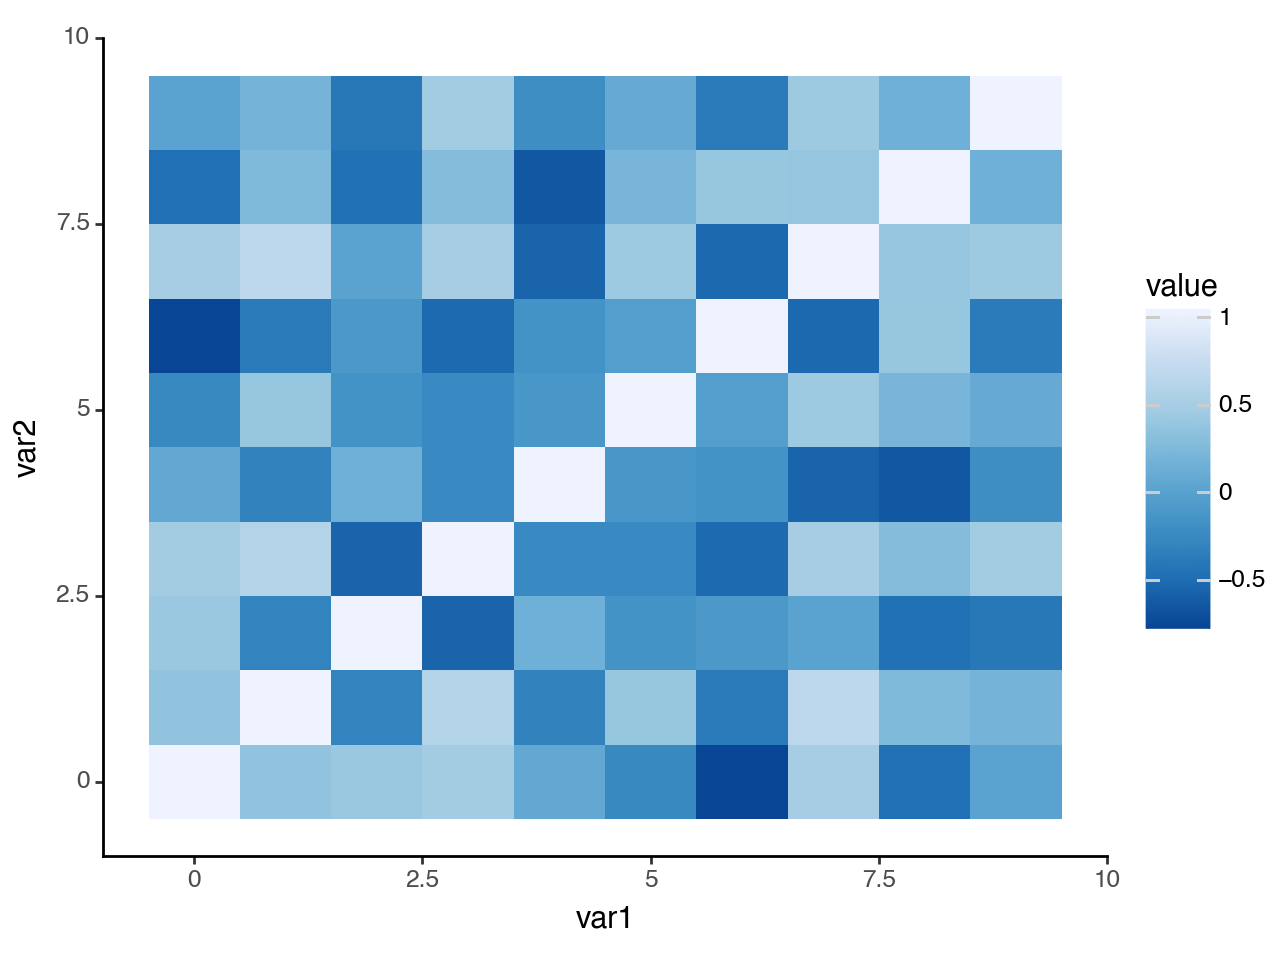

<Figure Size: (640 x 480)>

In [26]:
(ggplot(
mapping = aes('var1', 'var2', fill = 'value'),
data = tidy_corr) 
 + geom_tile()
 + scale_fill_distiller()
 + theme_classic()
)

<Axes: >

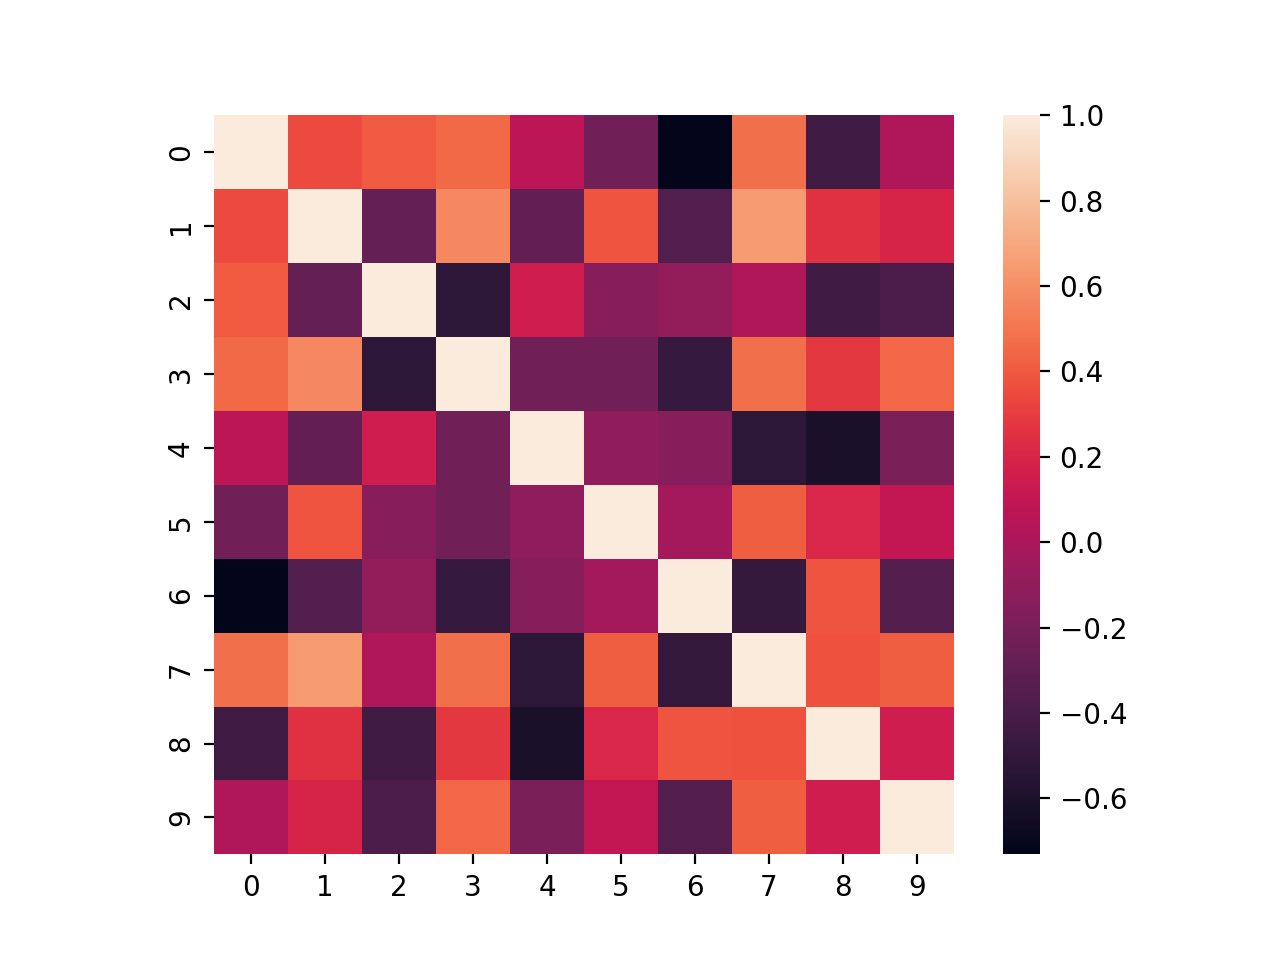

In [27]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            square=True)


In [29]:
# !pip install igraph

## Networks using igraph

/Users/vitaly/miniconda3/envs/py31012/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


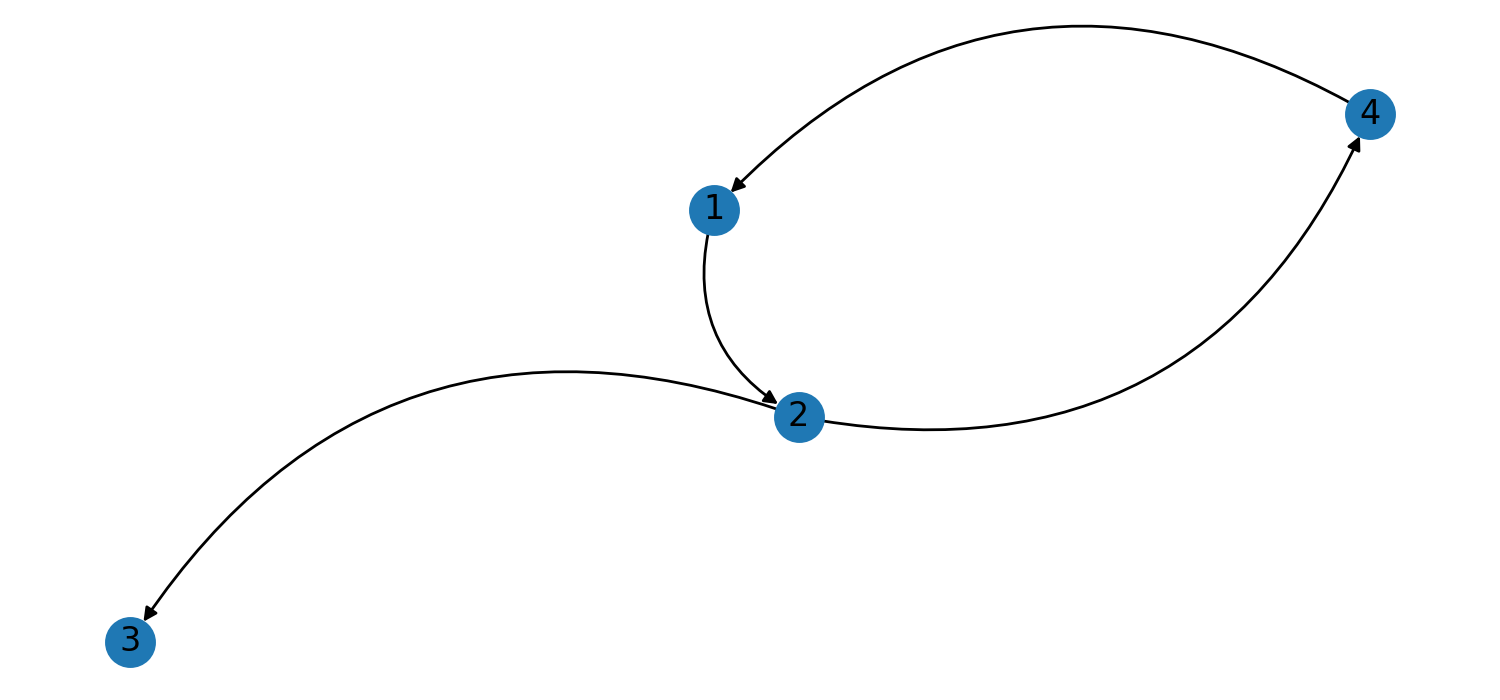

In [30]:
import matplotlib.pylab as plt
import networkx as nx

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

G = nx.DiGraph()

pos = nx.spring_layout(G)
G.add_nodes_from([1, 2, 3, 4])
G.add_edges_from([(1, 2), (2, 4), (2, 3), (4, 1)])

nx.draw(G, with_labels=True, connectionstyle="arc3,rad=0.4")

plt.show()

## Maps

In [32]:
# !pip install geodatasets

In [33]:
# import geodatasets

In [34]:
# geodatasets.data.flatten().keys()

In [36]:
# !pip install geopandas

In [37]:
import geopandas as gpd

(601957.0390199985, 1725518.2223800006, 5916926.871695002, 7442632.281605001)

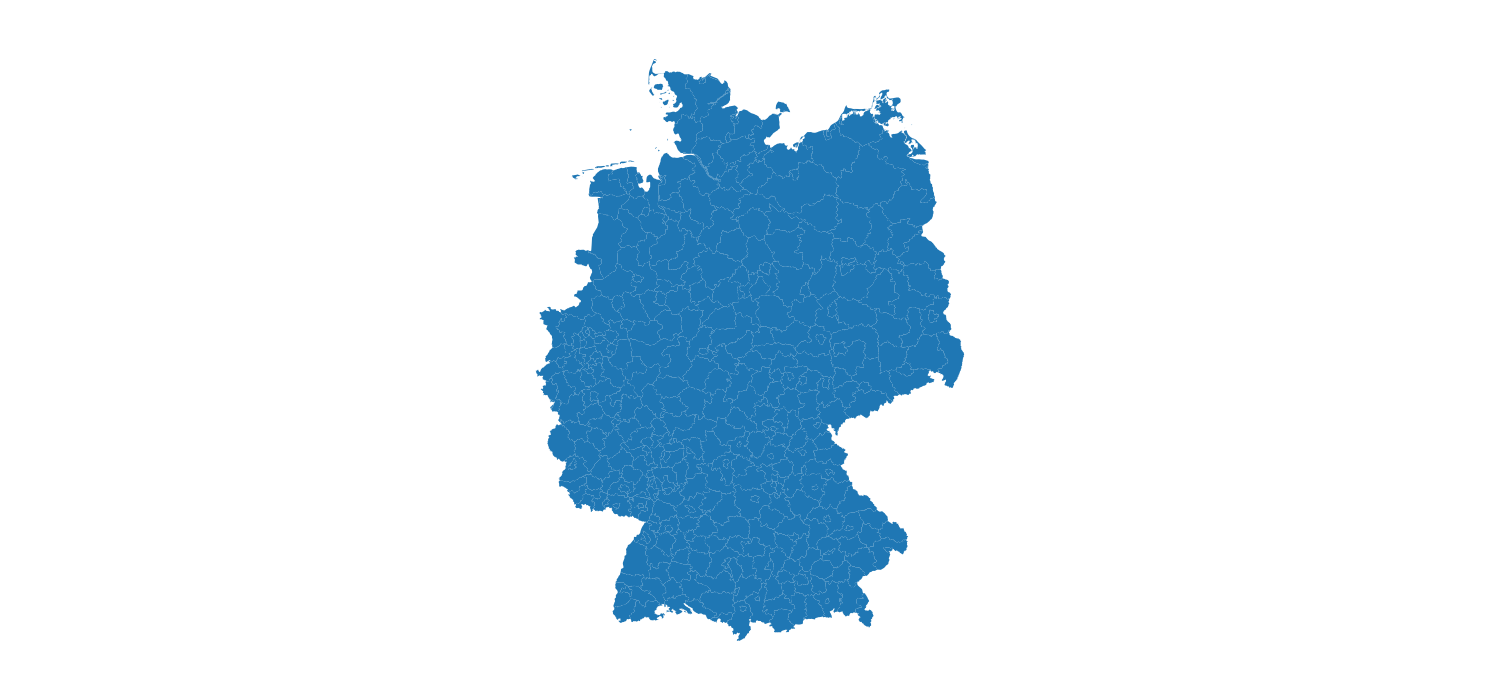

In [43]:
from matplotlib import *
from matplotlib.pyplot import *

# the link to download the dataset:
#https://hub.arcgis.com/datasets/ab340b8eb5a245beac0ddca089da6c98_0/explore

germany_kreise_map = gpd.read_file('./VG250_Kreisgrenzen_2019_-1847160185002596751/VG250_KRS_2023.shp')
germany_kreise_map.plot()
axis('off')

In [44]:
germany_kreise_map

,OBJID,BEGINN,ADE,GF,BSG,ARS,AGS,SDV_ARS,GEN,BEZ,...,SN_V1,SN_V2,SN_G,FK_S3,NUTS,ARS_0,AGS_0,WSK,DLM_ID,geometry
0,DEBKGVG200000C75,2022-12-20,4,4,1,01001,01001,010010000000,Flensburg,Kreisfreie Stadt,...,00,00,000,R,DEF01,010010000000,01001000,2008-01-01,DEBKGDL20000002R,"POLYGON ((1047812.976 7327520.138, 1047870.613..."
1,DEBKGVG200000C76,2022-12-20,4,4,1,01002,01002,010020000000,Kiel,Kreisfreie Stadt,...,00,00,000,R,DEF02,010020000000,01002000,2006-01-01,DEBKGDL20000E43X,"POLYGON ((1132025.511 7252280.912, 1132071.476..."
2,DEBKGVG200000C77,2022-12-20,4,4,1,01003,01003,010030000000,Lübeck,Kreisfreie Stadt,...,00,00,000,R,DEF03,010030000000,01003000,2006-02-01,DEBKGDL20000DYM9,"POLYGON ((1210803.734 7167763.774, 1211026.580..."
3,DEBKGVG200000C78,2022-12-20,4,4,1,01004,01004,010040000000,Neumünster,Kreisfreie Stadt,...,00,00,000,R,DEF04,010040000000,01004000,1970-04-26,DEBKGDL20000E4KX,"POLYGON ((1112687.973 7198562.476, 1112875.749..."
4,DEBKGVG200000C79,2023-04-26,4,4,1,01051,01051,010510044044,Dithmarschen,Kreis,...,00,00,000,R,DEF05,010510000000,01051000,2011-08-01,DEBKGDL20000E14G,"MULTIPOLYGON (((967305.383 7181518.322, 967432..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,DEBKGVG200000CIY,2022-12-20,4,2,1,13003,13003,130030000000,Rostock,Kreisfreie Stadt,...,00,00,000,R,DE803,130030000000,13003000,2007-01-01,DEBKGDL20000003J,"MULTIPOLYGON (((1347398.976 7204326.928, 13472..."
426,DEBKGVG200000CIZ,2015-06-18,4,2,1,13072,13072,130720043043,Rostock,Landkreis,...,00,00,000,R,DE80K,130720000000,13072000,2011-09-04,DEBKGDL20000SRLP,"POLYGON ((1291841.485 7189655.566, 1292007.810..."
427,DEBKGVG200000CJ0,2022-12-20,4,2,1,13073,13073,130730088088,Vorpommern-Rügen,Landkreis,...,00,00,000,R,DE80L,130730000000,13073000,2011-09-04,DEBKGDL20000QGFU,"MULTIPOLYGON (((1394142.293 7260030.186, 13940..."
428,DEBKGVG200000CJ1,2020-08-27,4,2,1,13074,13074,130740087087,Nordwestmecklenburg,Landkreis,...,00,00,000,R,DE80M,130740000000,13074000,2011-09-04,DEBKGDL20000QGFR,"MULTIPOLYGON (((1263339.591 7160102.393, 12630..."


In [102]:
# help(pd.read_csv)

In [46]:

# the link to download the dataset:
# https://www.bundeswahlleiterin.de/europawahlen/2024/ergebnisse/opendata/ew24/csv/

elect = pd.read_csv('kerg2.csv',
                encoding = 'utf-8',
                skiprows = 9, 
                header = 'infer',
                sep = ';',
                decimal = ',')

In [47]:
elect

,Wahlart,Wahltag,Gebietsart,Gebietsnummer,Gebietsname,UegGebietsart,UegGebietsnummer,Gruppenart,Gruppenname,Gruppenreihenfolge,Stimme,Anzahl,Prozent,VorpAnzahl,VorpProzent,DiffProzent,DiffProzentPkt,Bemerkung
0,EP,09.06.2024,Bund,99,Bundesgebiet,NaN,NaN,System-Gruppe,Wahlberechtigte,-4,NaN,61941751.0,NaN,61600263.0,NaN,0.554361,NaN,NaN
1,EP,09.06.2024,Bund,99,Bundesgebiet,NaN,NaN,System-Gruppe,Wählende,-3,NaN,40128348.0,64.784007,37807746.0,61.375949,6.137901,3.408058,NaN
2,EP,09.06.2024,Bund,99,Bundesgebiet,NaN,NaN,System-Gruppe,Ungültige,-2,1.0,332136.0,0.827684,410857.0,1.086701,-19.160194,-0.259016,NaN
3,EP,09.06.2024,Bund,99,Bundesgebiet,NaN,NaN,System-Gruppe,Gültige,-1,1.0,39796212.0,99.172316,37396889.0,98.913299,6.415836,0.259016,NaN
4,EP,09.06.2024,Bund,99,Bundesgebiet,NaN,NaN,Partei,CDU,1,1.0,9431567.0,23.699660,8438975.0,22.565981,11.761997,1.133679,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16259,EP,09.06.2024,Kreis,16077,Altenburger Land,LAND,16.0,Partei,LETZTE GENERATION,31,1.0,68.0,0.157927,NaN,NaN,NaN,NaN,NaN
16260,EP,09.06.2024,Kreis,16077,Altenburger Land,LAND,16.0,Partei,PDV,32,1.0,36.0,0.083608,NaN,NaN,NaN,NaN,NaN
16261,EP,09.06.2024,Kreis,16077,Altenburger Land,LAND,16.0,Partei,PdF,33,1.0,112.0,0.260114,NaN,NaN,NaN,NaN,NaN
16262,EP,09.06.2024,Kreis,16077,Altenburger Land,LAND,16.0,Partei,V-Partei³,34,1.0,50.0,0.116122,NaN,NaN,NaN,NaN,NaN


In [48]:
elect['Gruppenname'].unique()

array(['Wahlberechtigte', 'Wählende', 'Ungültige', 'Gültige', 'CDU',
       'GRÜNE', 'SPD', 'AfD', 'CSU', 'DIE LINKE', 'FDP', 'Die PARTEI',
       'FREIE WÄHLER', 'Tierschutzpartei', 'ÖDP', 'FAMILIE', 'Volt',
       'PIRATEN', 'MERA25', 'HEIMAT', 'TIERSCHUTZ hier!',
       'Verjüngungsforschung', 'BIG', 'Bündnis C', 'PdH',
       'MENSCHLICHE WELT', 'DKP', 'MLPD', 'SGP', 'ABG', 'dieBasis',
       'BÜNDNIS DEUTSCHLAND', 'BSW', 'DAVA', 'KLIMALISTE',
       'LETZTE GENERATION', 'PDV', 'PdF', 'V-Partei³', 'Übrige'],
      dtype=object)

In [49]:
elect[elect['Gebietsart'] == 'Kreis']

,Wahlart,Wahltag,Gebietsart,Gebietsnummer,Gebietsname,UegGebietsart,UegGebietsnummer,Gruppenart,Gruppenname,Gruppenreihenfolge,Stimme,Anzahl,Prozent,VorpAnzahl,VorpProzent,DiffProzent,DiffProzentPkt,Bemerkung
664,EP,09.06.2024,Kreis,1001,"Flensburg, Stadt",LAND,1.0,System-Gruppe,Wahlberechtigte,-4,NaN,70929.0,NaN,70431.0,NaN,0.707075,NaN,NaN
665,EP,09.06.2024,Kreis,1001,"Flensburg, Stadt",LAND,1.0,System-Gruppe,Wählende,-3,NaN,41851.0,59.004074,39647.0,56.291974,5.559059,2.712101,NaN
666,EP,09.06.2024,Kreis,1001,"Flensburg, Stadt",LAND,1.0,System-Gruppe,Ungültige,-2,1.0,299.0,0.714439,237.0,0.597775,26.160338,0.116664,NaN
667,EP,09.06.2024,Kreis,1001,"Flensburg, Stadt",LAND,1.0,System-Gruppe,Gültige,-1,1.0,41552.0,99.285561,39410.0,99.402225,5.435169,-0.116664,NaN
668,EP,09.06.2024,Kreis,1001,"Flensburg, Stadt",LAND,1.0,Partei,GRÜNE,1,1.0,9911.0,23.852041,14603.0,37.054047,-32.130384,-13.202006,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16259,EP,09.06.2024,Kreis,16077,Altenburger Land,LAND,16.0,Partei,LETZTE GENERATION,31,1.0,68.0,0.157927,NaN,NaN,NaN,NaN,NaN
16260,EP,09.06.2024,Kreis,16077,Altenburger Land,LAND,16.0,Partei,PDV,32,1.0,36.0,0.083608,NaN,NaN,NaN,NaN,NaN
16261,EP,09.06.2024,Kreis,16077,Altenburger Land,LAND,16.0,Partei,PdF,33,1.0,112.0,0.260114,NaN,NaN,NaN,NaN,NaN
16262,EP,09.06.2024,Kreis,16077,Altenburger Land,LAND,16.0,Partei,V-Partei³,34,1.0,50.0,0.116122,NaN,NaN,NaN,NaN,NaN


In [50]:
elect[elect['Gebietsname'].str.contains('Rostock') == True]

,Wahlart,Wahltag,Gebietsart,Gebietsnummer,Gebietsname,UegGebietsart,UegGebietsnummer,Gruppenart,Gruppenname,Gruppenreihenfolge,Stimme,Anzahl,Prozent,VorpAnzahl,VorpProzent,DiffProzent,DiffProzentPkt,Bemerkung
14041,EP,09.06.2024,Kreis,13003,Rostock,LAND,13.0,System-Gruppe,Wahlberechtigte,-4,NaN,168223.0,NaN,168169.0,NaN,0.032111,NaN,NaN
14042,EP,09.06.2024,Kreis,13003,Rostock,LAND,13.0,System-Gruppe,Wählende,-3,NaN,105728.0,62.849908,101031.0,60.077065,4.649068,2.772842,NaN
14043,EP,09.06.2024,Kreis,13003,Rostock,LAND,13.0,System-Gruppe,Ungültige,-2,1.0,1198.0,1.133096,1356.0,1.342162,-11.651917,-0.209066,NaN
14044,EP,09.06.2024,Kreis,13003,Rostock,LAND,13.0,System-Gruppe,Gültige,-1,1.0,104530.0,98.866904,99675.0,98.657838,4.870830,0.209066,NaN
14045,EP,09.06.2024,Kreis,13003,Rostock,LAND,13.0,Partei,CDU,1,1.0,17494.0,16.735865,17268.0,17.324304,1.308779,-0.588439,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14192,EP,09.06.2024,Kreis,13072,Landkreis Rostock,LAND,13.0,Partei,LETZTE GENERATION,31,1.0,236.0,0.194919,NaN,NaN,NaN,NaN,NaN
14193,EP,09.06.2024,Kreis,13072,Landkreis Rostock,LAND,13.0,Partei,PDV,32,1.0,146.0,0.120585,NaN,NaN,NaN,NaN,NaN
14194,EP,09.06.2024,Kreis,13072,Landkreis Rostock,LAND,13.0,Partei,PdF,33,1.0,520.0,0.429482,NaN,NaN,NaN,NaN,NaN
14195,EP,09.06.2024,Kreis,13072,Landkreis Rostock,LAND,13.0,Partei,V-Partei³,34,1.0,139.0,0.114804,NaN,NaN,NaN,NaN,NaN


In [51]:
# elect['Gebietsnummer'].dtype

germany_kreise_map['Gebietsnummer'] = germany_kreise_map['AGS'].astype('int') 

In [52]:
germany_kreise_map['Gebietsnummer']

0       1001
1       1002
2       1003
3       1004
4       1051
       ...  
425    13003
426    13072
427    13073
428    13074
429    13075
Name: Gebietsnummer, Length: 430, dtype: int64

### Merging data and map

In [53]:
elect['Gruppenname'].unique()

array(['Wahlberechtigte', 'Wählende', 'Ungültige', 'Gültige', 'CDU',
       'GRÜNE', 'SPD', 'AfD', 'CSU', 'DIE LINKE', 'FDP', 'Die PARTEI',
       'FREIE WÄHLER', 'Tierschutzpartei', 'ÖDP', 'FAMILIE', 'Volt',
       'PIRATEN', 'MERA25', 'HEIMAT', 'TIERSCHUTZ hier!',
       'Verjüngungsforschung', 'BIG', 'Bündnis C', 'PdH',
       'MENSCHLICHE WELT', 'DKP', 'MLPD', 'SGP', 'ABG', 'dieBasis',
       'BÜNDNIS DEUTSCHLAND', 'BSW', 'DAVA', 'KLIMALISTE',
       'LETZTE GENERATION', 'PDV', 'PdF', 'V-Partei³', 'Übrige'],
      dtype=object)

In [54]:
elect1 = elect[ elect['Gruppenname'] == 'GRÜNE' ]

In [55]:
df_merged = germany_kreise_map.merge(elect1, #map_df merge to df
                                     left_on = ['Gebietsnummer'], 
                                     right_on = ['Gebietsnummer'])

In [56]:
df_merged

,OBJID,BEGINN,ADE,GF,BSG,ARS,AGS,SDV_ARS,GEN,BEZ,...,Gruppenname,Gruppenreihenfolge,Stimme,Anzahl,Prozent,VorpAnzahl,VorpProzent,DiffProzent,DiffProzentPkt,Bemerkung
0,DEBKGVG200000C75,2022-12-20,4,4,1,01001,01001,010010000000,Flensburg,Kreisfreie Stadt,...,GRÜNE,1,1.0,9911.0,23.852041,14603.0,37.054047,-32.130384,-13.202006,NaN
1,DEBKGVG200000CI9,2022-12-20,4,2,1,01001,01001,010010000000,Flensburg,Kreisfreie Stadt,...,GRÜNE,1,1.0,9911.0,23.852041,14603.0,37.054047,-32.130384,-13.202006,NaN
2,DEBKGVG200000C76,2022-12-20,4,4,1,01002,01002,010020000000,Kiel,Kreisfreie Stadt,...,GRÜNE,1,1.0,28409.0,24.375574,40324.0,36.988387,-29.548160,-12.612813,NaN
3,DEBKGVG200000CIA,2022-12-20,4,2,1,01002,01002,010020000000,Kiel,Kreisfreie Stadt,...,GRÜNE,1,1.0,28409.0,24.375574,40324.0,36.988387,-29.548160,-12.612813,NaN
4,DEBKGVG200000C77,2022-12-20,4,4,1,01003,01003,010030000000,Lübeck,Kreisfreie Stadt,...,GRÜNE,1,1.0,18906.0,19.703191,28633.0,31.643919,-33.971292,-11.940728,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,DEBKGVG200000CI4,2022-12-20,4,4,1,16073,16073,160730077077,Saalfeld-Rudolstadt,Landkreis,...,GRÜNE,5,1.0,1250.0,2.538277,3328.0,6.297305,-62.439904,-3.759028,NaN
426,DEBKGVG200000CI5,2022-12-20,4,4,1,16074,16074,160745052018,Saale-Holzland-Kreis,Landkreis,...,GRÜNE,5,1.0,1483.0,3.281772,3183.0,7.218014,-53.408734,-3.936242,NaN
427,DEBKGVG200000CI6,2022-12-20,4,4,1,16075,16075,160750098098,Saale-Orla-Kreis,Landkreis,...,GRÜNE,5,1.0,812.0,2.118777,2253.0,5.411963,-63.959166,-3.293186,NaN
428,DEBKGVG200000CI7,2022-12-20,4,4,1,16076,16076,160760022022,Greiz,Landkreis,...,GRÜNE,5,1.0,1222.0,2.349774,3031.0,5.822352,-59.683273,-3.472578,NaN


In [57]:
from matplotlib.pyplot import *

(601957.0390199985, 1725518.2223800006, 5916926.871695002, 7442632.281605001)

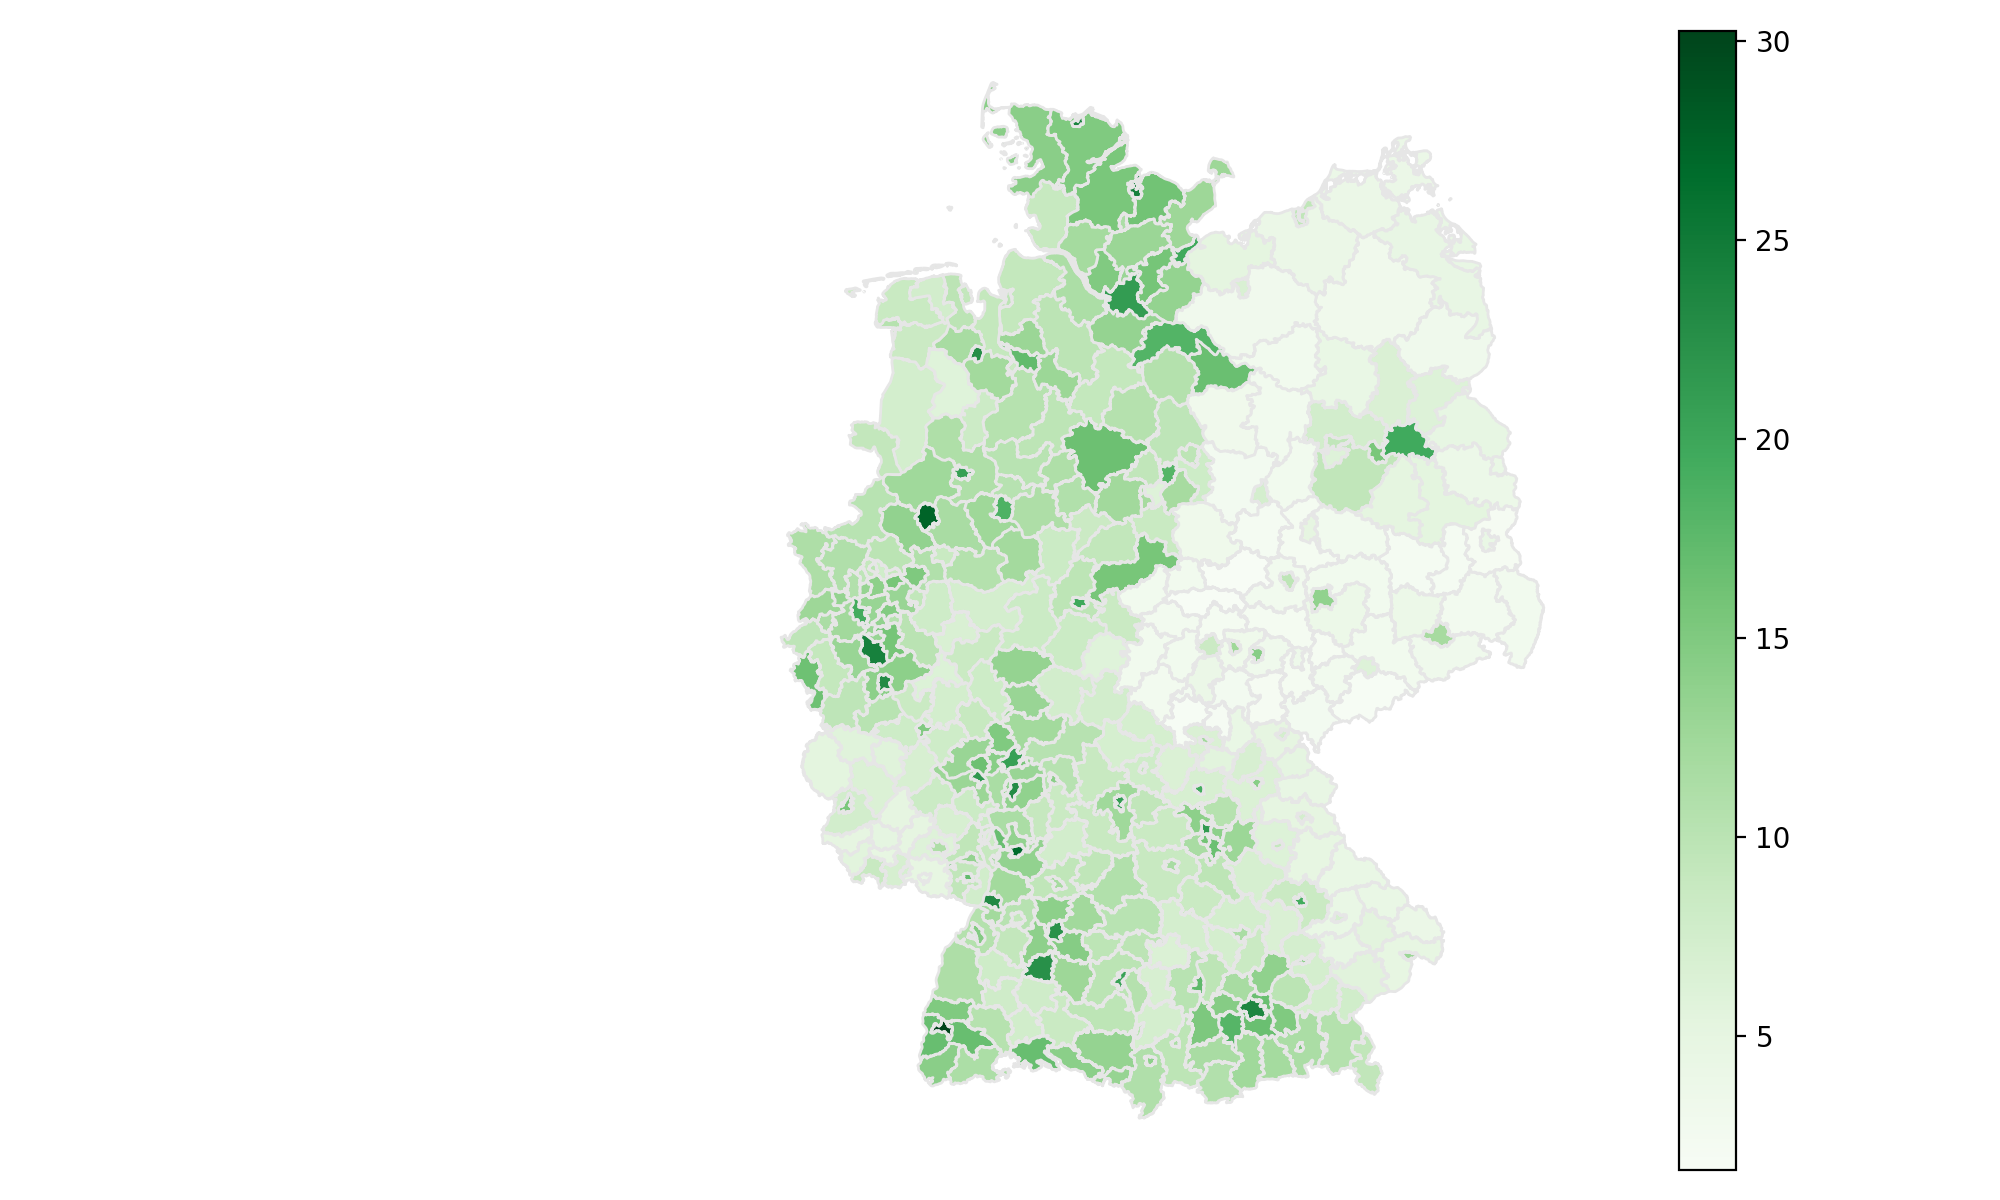

In [58]:
fig, ax = subplots(1, figsize=(10,6))

df_merged.plot(column = 'Prozent', 
               cmap = 'Greens', # color scheme
               linewidth = 1, 
               ax = ax, 
               edgecolor = '0.9', 
               legend = True)
ax.axis('off')